In [1]:
import sys

sys.path.append('..')

In [2]:
from rbf_functions import rbfs
import rbf_functions

# rbfs = [rbf_functions.multiquadric_rbf, rbf_functions.exponential_rbf]

In [8]:

centers = np.array([
                    [0.25, 0.25],
                    [0.5, 0.5],
                    [0.75, 0.75]
                   ])
radii = np.array([[0.1, 0.1],
                  [0.1, 0.1],
                  [0.1, 0.1]
                 ])
weights = np.array([[1/3], [1/3], [1/3]])
# weights = [[1]]                  

rbf_input = np.array([0, 0])
# centers = np.array([[0.5, 0.5]])
# radii = np.array([[0.1, 0.1]])
# weights = np.array([[1]])

rbf_functions.exponential_rbf(rbf_input, centers, radii, weights)

array([1.24221772e-06])

In [9]:
# setup a grid for the inputs
grid_size = 100
x = np.linspace(0, 1, grid_size)
y = np.linspace(0, 1, grid_size)

X, Y = np.meshgrid(x, y)

# run the rbf for each point

scores = {}
for function in rbfs:
    scores[function.__name__] = np.empty(X.shape)

for i in range(grid_size):
    for j in range(grid_size):
        rbf_input = np.array([X[i, j], Y[i, j]])
        # run RBF
        
        for function in rbfs:
            score = function(rbf_input, centers, radii, weights)
            scores[function.__name__][i,j] = score

# visualize results

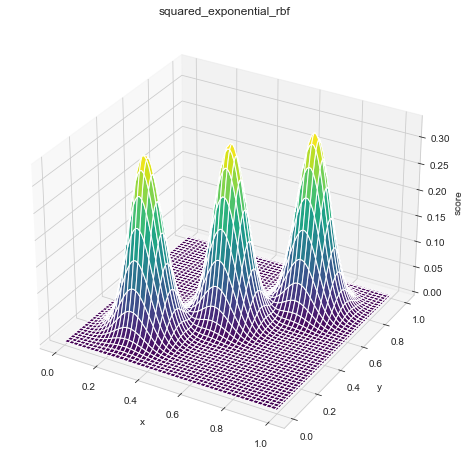

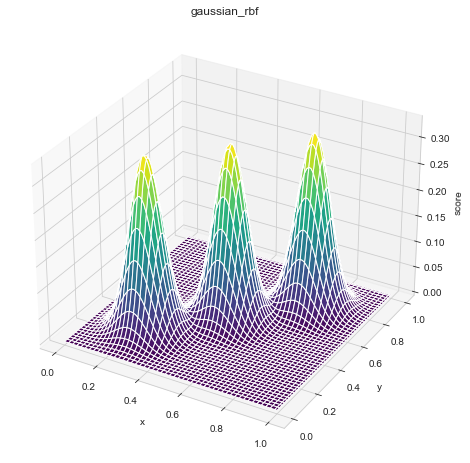

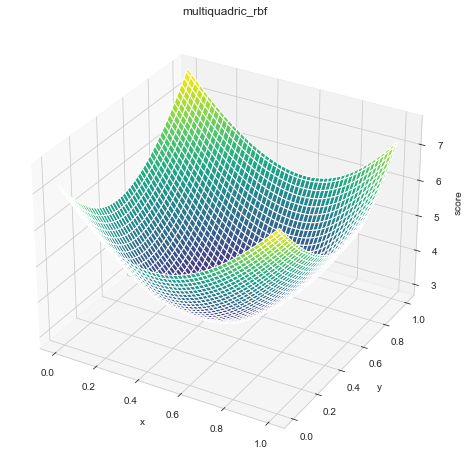

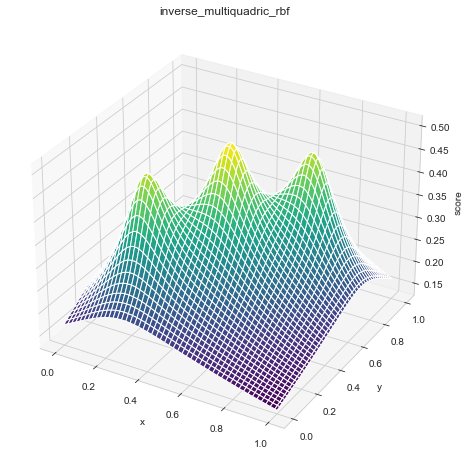

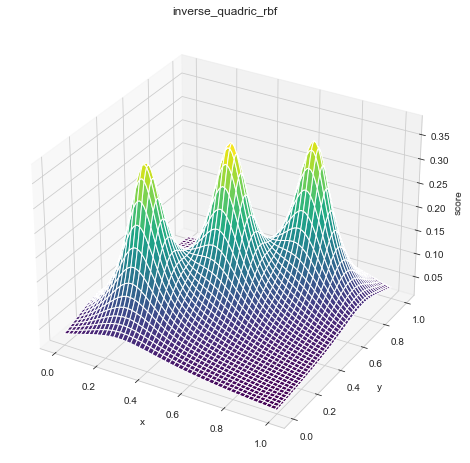

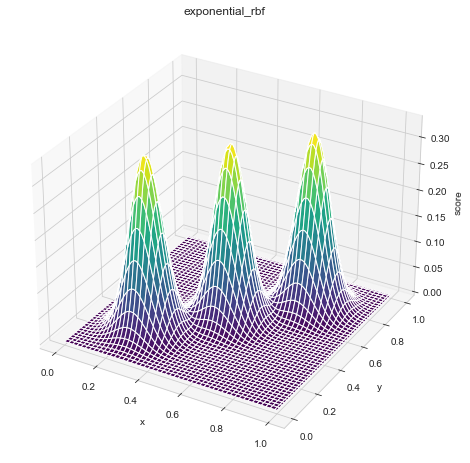

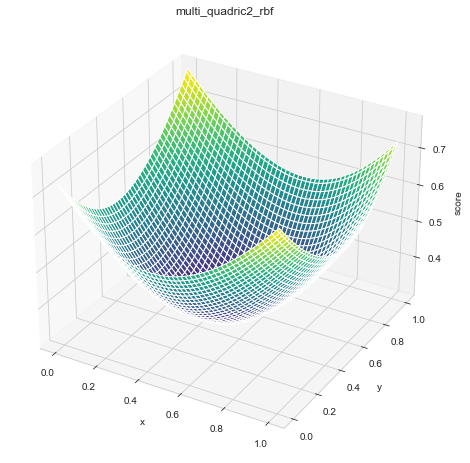

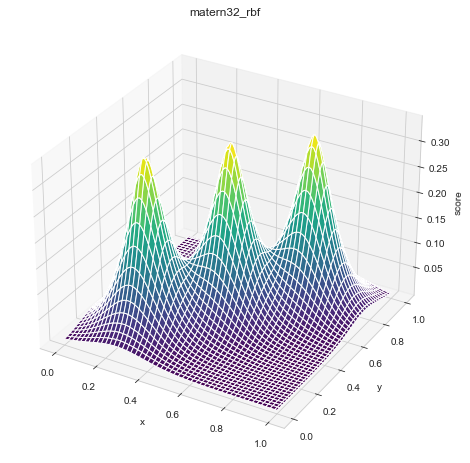

In [10]:

for k, score in scores.items():
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot_surface(X, Y, score, cmap='viridis',
                   edgecolor='white')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('score');
    ax.set_title(k)
    
    plt.show()